# Mura Data Preprocessing

In [1]:
import pandas as pd
import glob2
import os
import cv2
import sys
from matplotlib import pylab as plt
import numpy as np
from tqdm import tqdm
import shutil
import json
# import imgaug as ia
# from imgaug import augmenters as iaa

In [2]:
train_df = pd.read_csv(r'E:\Xing\Data\MURA-v1.1\MURA-v1.1\train_image_paths.csv', header=None, names=['FilePath'])
valid_df=pd.read_csv(r'E:\Xing\Data\MURA-v1.1\MURA-v1.1\valid_image_paths.csv', header=None, names=['FilePath'])
train_labels_df=pd.read_csv(r'E:\Xing\Data\MURA-v1.1\MURA-v1.1\train_labeled_studies.csv', names=['FilePath', 'Labels'])
valid_labels_df=pd.read_csv(r'E:\Xing\Data\MURA-v1.1\MURA-v1.1\valid_labeled_studies.csv', names=['FilePath', 'Labels'])

In [3]:
train_df.head()

,FilePath
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...


In [4]:
import os
base_path = r'E:\Xing\Data\MURA-v1.1'
train_df['window_path'] = train_df.apply(lambda x:os.path.join(base_path,x['FilePath'].replace('/','\\')),axis=1)
valid_df['window_path'] = train_df.apply(lambda x:os.path.join(base_path,x['FilePath'].replace('/','\\')),axis=1)

XR_SHOULDER-patient01208-study1_positive
XR_ELBOW-patient01412-study1_positive
XR_SHOULDER-patient01581-study1_negative
XR_ELBOW-patient06095-study1_negative
XR_FINGER-patient03341-study1_positive
XR_WRIST-patient08051-study1_negative


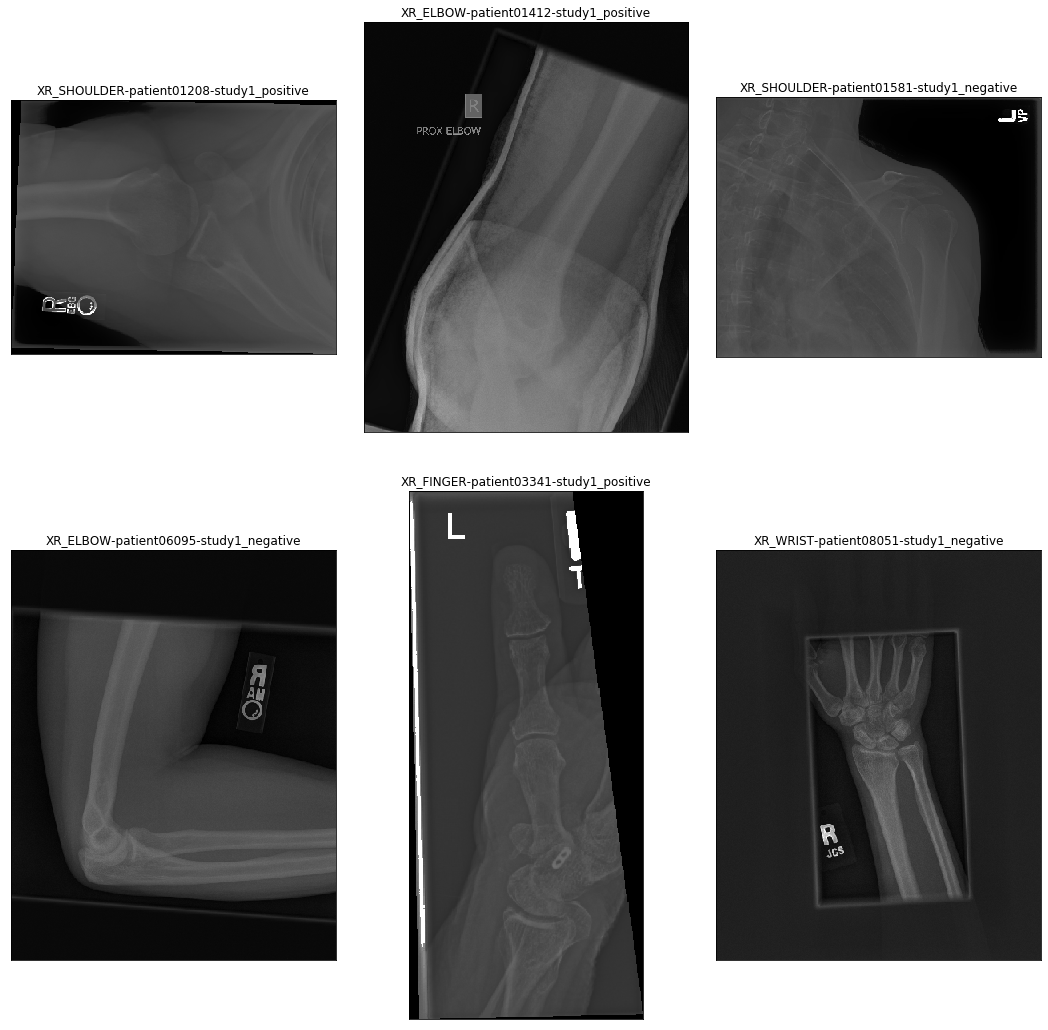

In [5]:
w, h = 10, 10
fig = plt.figure(figsize=(15, 15))
columns, rows = 3, 2
end, start = train_df.loc[0:].shape
ax = []
import random
for i in range(columns*rows):
    # img = np.array(Image.open(train_img_path.values[k][0]))
    k = random.randint(start, end)
    title = (train_df.iloc[k,1]).split('\\')
    title = title[-4]+'-'+title[-3]+'-'+title[-2]
    print(title)
    img = cv2.imread((train_df.iloc[k,1]))
    k += 1
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title(title)  # set title
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap="gray")
plt.tight_layout(True)
plt.show()  # finally, render the plot

In [4]:
train_df['Label'] = train_df.apply(lambda x:1 if 'positive' in x.FilePath else 0, axis=1)
valid_df['Label'] = valid_df.apply(lambda x:1 if 'positive' in x.FilePath else 0, axis=1)

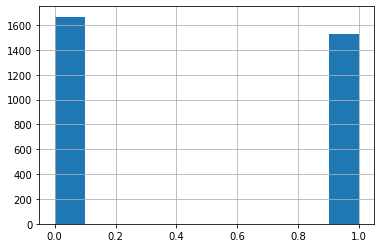

In [7]:
valid_df.Label.hist()

In [8]:
train_df.to_csv('train.csv')
valid_df.to_csv('valid.csv')

In [6]:
train_df['Label'] = train_df.apply(lambda x:1 if 'positive' in x.FilePath else 0, axis=1)
train_df['BodyPart'] = train_df.apply(lambda x: x.FilePath.split('/')[2][3:],axis=1)
train_df['StudyType'] = train_df.apply(lambda x: x.FilePath.split('/')[4][:6],axis=1)
valid_df['Label'] = valid_df.apply(lambda x:1 if 'positive' in x.FilePath else 0, axis=1)
valid_df['BodyPart'] = valid_df.apply(lambda x: x.FilePath.split('/')[2][3:],axis=1)
valid_df['StudyType'] = valid_df.apply(lambda x: x.FilePath.split('/')[4][:6],axis=1)

In [7]:
train_df.head()

,FilePath,window_path,Label,BodyPart,StudyType
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,E:\Xing\MURA\MURA-v1.1\train\XR_SHOULDER\patie...,1,SHOULDER,study1
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,E:\Xing\MURA\MURA-v1.1\train\XR_SHOULDER\patie...,1,SHOULDER,study1
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,E:\Xing\MURA\MURA-v1.1\train\XR_SHOULDER\patie...,1,SHOULDER,study1
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,E:\Xing\MURA\MURA-v1.1\train\XR_SHOULDER\patie...,1,SHOULDER,study1
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,E:\Xing\MURA\MURA-v1.1\train\XR_SHOULDER\patie...,1,SHOULDER,study1


In [8]:
valid_df.head()

,FilePath,window_path,Label,BodyPart,StudyType
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,E:\Xing\MURA\MURA-v1.1\train\XR_SHOULDER\patie...,1,WRIST,study1
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,E:\Xing\MURA\MURA-v1.1\train\XR_SHOULDER\patie...,1,WRIST,study1
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,E:\Xing\MURA\MURA-v1.1\train\XR_SHOULDER\patie...,1,WRIST,study1
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,E:\Xing\MURA\MURA-v1.1\train\XR_SHOULDER\patie...,1,WRIST,study1
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,E:\Xing\MURA\MURA-v1.1\train\XR_SHOULDER\patie...,1,WRIST,study1


In [9]:
train_df['valid'] = 0
valid_df['valid'] = 1

In [10]:
main_df = pd.concat([train_df,valid_df])

In [11]:
main_df.head()

,FilePath,window_path,Label,BodyPart,StudyType,valid
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,E:\Xing\MURA\MURA-v1.1\train\XR_SHOULDER\patie...,1,SHOULDER,study1,0
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,E:\Xing\MURA\MURA-v1.1\train\XR_SHOULDER\patie...,1,SHOULDER,study1,0
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,E:\Xing\MURA\MURA-v1.1\train\XR_SHOULDER\patie...,1,SHOULDER,study1,0
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,E:\Xing\MURA\MURA-v1.1\train\XR_SHOULDER\patie...,1,SHOULDER,study1,0
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,E:\Xing\MURA\MURA-v1.1\train\XR_SHOULDER\patie...,1,SHOULDER,study1,0


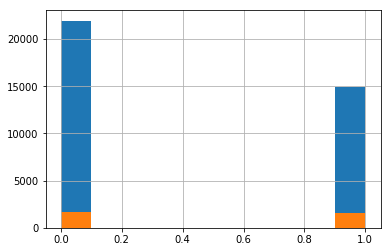

In [12]:
for label,group in main_df.groupby('valid'):
    group.Label.hist()

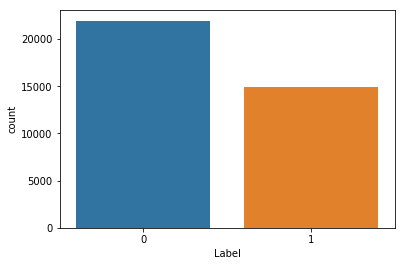

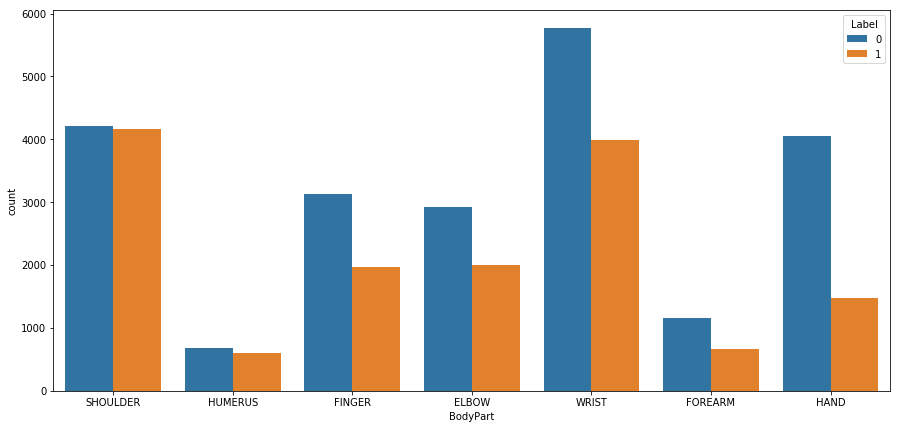

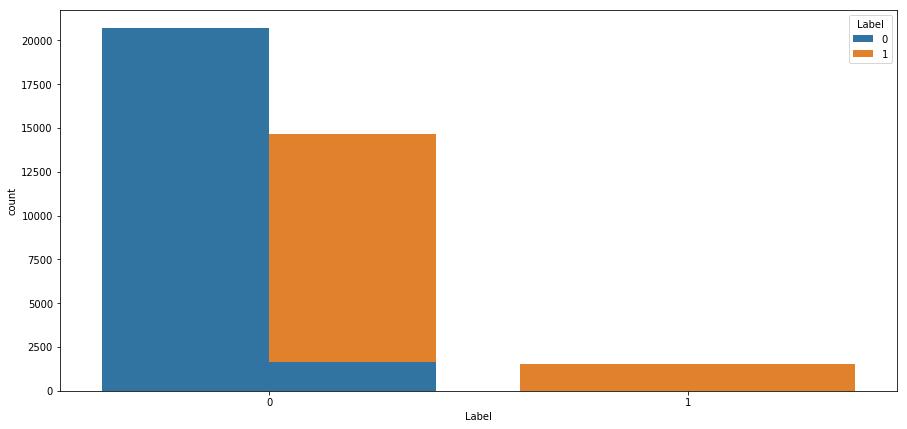

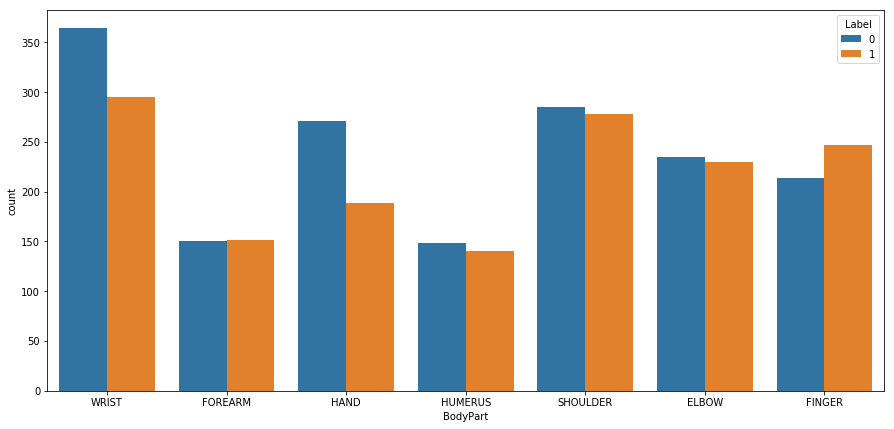

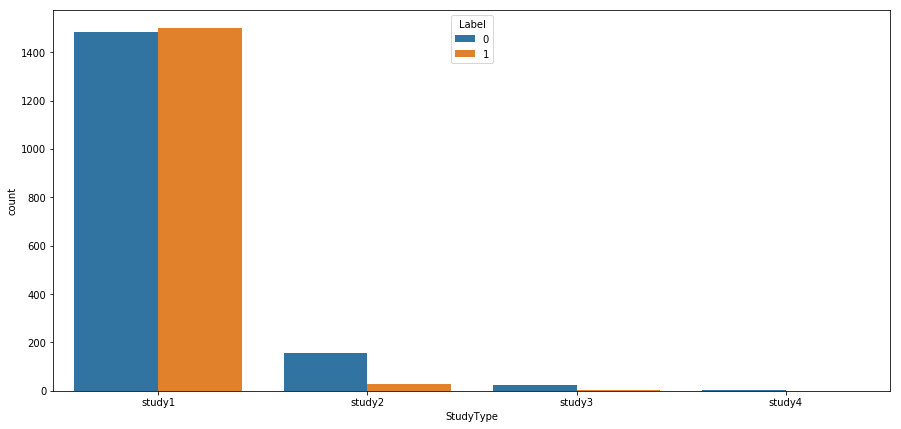

In [13]:
import seaborn as sns

sns.countplot(train_df['Label'])
plt.figure(figsize=(15,7))
sns.countplot(data=train_df,x='BodyPart',hue='Label')
plt.figure(figsize=(15,7))
sns.countplot(data=train_df,x='StudyType',hue='Label')

sns.countplot(valid_df['Label'])
plt.figure(figsize=(15,7))
sns.countplot(data=valid_df,x='BodyPart',hue='Label')
plt.figure(figsize=(15,7))
sns.countplot(data=valid_df,x='StudyType',hue='Label')

In [11]:
train_df.set_index(["FilePath", "BodyPart"]).count(level="BodyPart")

,window_path,Label,StudyType,valid
BodyPart,,,,
ELBOW,4931,4931,4931,4931
FINGER,5106,5106,5106,5106
FOREARM,1825,1825,1825,1825
HAND,5543,5543,5543,5543
HUMERUS,1272,1272,1272,1272
SHOULDER,8379,8379,8379,8379
WRIST,9752,9752,9752,9752


In [12]:
train_df.set_index(["FilePath", "Label"]).count(level="Label")

,window_path,BodyPart,StudyType,valid
Label,,,,
0,21935,21935,21935,21935
1,14873,14873,14873,14873


In [ ]:
train_df.BodyPart.hist()

In [14]:
main_df.to_csv('data_valid.csv')

In [48]:
main_df.head()

,FilePath,window_path,Label,BodyPart,StudyType,valid
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,E:\Xing\MURA\MURA-v1.1\train\XR_SHOULDER\patie...,1,SHOULDER,study1,0
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,E:\Xing\MURA\MURA-v1.1\train\XR_SHOULDER\patie...,1,SHOULDER,study1,0
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,E:\Xing\MURA\MURA-v1.1\train\XR_SHOULDER\patie...,1,SHOULDER,study1,0
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,E:\Xing\MURA\MURA-v1.1\train\XR_SHOULDER\patie...,1,SHOULDER,study1,0
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,E:\Xing\MURA\MURA-v1.1\train\XR_SHOULDER\patie...,1,SHOULDER,study1,0


In [49]:
main_df['BodyPart'] == 'SHOULDER'

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
3167    False
3168    False
3169    False
3170    False
3171    False
3172    False
3173    False
3174    False
3175    False
3176    False
3177    False
3178    False
3179    False
3180    False
3181    False
3182    False
3183    False
3184    False
3185    False
3186    False
3187    False
3188    False
3189    False
3190    False
3191    False
3192    False
3193    False
3194    False
3195    False
3196    False
Name: BodyPart, Length: 40005, dtype: bool

In [19]:
a = np.random.rand(10,10)

In [44]:
b = np.array([a]*3)

In [45]:
b.shape

(3, 10, 10)

In [46]:
b = np.transpose(b,(1,2,0))

In [47]:
b.shape

(10, 10, 3)

In [7]:
df = pd.read_excel('1000数据标注cj.xlsx',sheet_name='1000_data')

In [8]:
df.columns = ['SID','ToT','Abn','Norm','nn','nn','nn']

In [9]:
df.dropna(subset=['ToT'],inplace=True)
df.head()

,SID,ToT,Abn,Norm,nn,nn,nn
2,8105.0,t01,ab00s06e16n01%ab01s18e24n01%ab03s27e41n01,nm00s0e06n02,NaN,NaN,NaN
3,8106.0,t02,ab00s07e09n01%ab01s25e32n01,nm00s0e07n02%nm01s09e25n02%nm02s32e42n02,NaN,NaN,NaN
4,8110.0,t02,ab00s23e27n02,nm00s0e23%nm01s28e43,NaN,NaN,NaN
5,8112.0,t01,ab00s31e35n02,nm00s0e30n02%nm01s35e42n02,NaN,NaN,NaN
6,8113.0,t01,ab00s0e09n01%ab01s10e35n02,NaN,NaN,NaN,NaN


In [10]:
df.reset_index(drop=True, inplace=True)
df.head()

,SID,ToT,Abn,Norm,nn,nn,nn
0,8105.0,t01,ab00s06e16n01%ab01s18e24n01%ab03s27e41n01,nm00s0e06n02,NaN,NaN,NaN
1,8106.0,t02,ab00s07e09n01%ab01s25e32n01,nm00s0e07n02%nm01s09e25n02%nm02s32e42n02,NaN,NaN,NaN
2,8110.0,t02,ab00s23e27n02,nm00s0e23%nm01s28e43,NaN,NaN,NaN
3,8112.0,t01,ab00s31e35n02,nm00s0e30n02%nm01s35e42n02,NaN,NaN,NaN
4,8113.0,t01,ab00s0e09n01%ab01s10e35n02,NaN,NaN,NaN,NaN


In [ ]:
# segment different description with '%'
# note that there may be missing some %
key_list=[]
Tot_list=[]
Sig_list = []

for idx,index in tqdm(enumerate(df['SID'])):
    
    n_abn = 0
    n_norm = 0
    if isinstance(df.Abn[idx],str):
        abn_data = df.Abn[idx].split('%')
        n_abn = len(abn_data)
    if isinstance(df.Norm[idx],str):
        norm_data = df.Norm[idx].split('%')
        n_norm = len(norm_data)
    print(index,n_abn,n_norm)
    
    for i in range(n_abn):
        name = str(int(index))+'_a_'+str(i)
        key_list.append(name)
        Sig_list.append(abn_data[i])
        Tot_list.append(df.ToT[idx])
        
    for i in range(n_norm):
        name = str(int(index))+'_n_'+str(i)
        key_list.append(name)
        Sig_list.append(norm_data[i])
        Tot_list.append(df.ToT[idx])
        

data = pd.DataFrame({'index':key_list,
                     'ToT':Tot_list,
                     'Signal':Sig_list
                     })

data.sort_values(by='index',inplace=True)

csv_name = 'main_csv.csv' #main_step1.csv

data.to_csv(csv_name,index = False,sep = ',')

In [27]:
csv_name = 'main_csv.csv'
data = pd.read_csv(csv_name)

In [28]:
data.head()

,index,ToT,Signal
0,10013_a_0,t02,ab00s0e04n07
1,10013_a_1,t02,ab01s08e09n07
2,10013_a_2,t02,ab02s18e20n07
3,10013_n_0,t02,nm00s20e28
4,10017_a_0,t02,ab00s0e05n07


In [29]:
data['norm'] = data.apply(lambda x: x['index'].split('_')[1], axis=1)

In [30]:
data['intact']=data.apply(lambda x: 1 if ('s' in x['Signal']) & ('e' in x['Signal']) else 0, axis = 1)

1    1152
0       6
Name: intact, dtype: int64

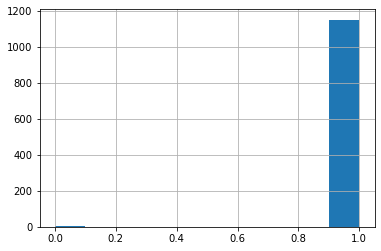

In [31]:
hist = data.intact.hist()
data.intact.value_counts()

In [32]:
data_c=data[~data['intact'].isin([0])]

1    1152
Name: intact, dtype: int64

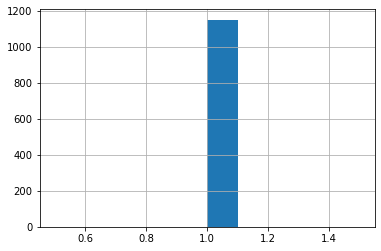

In [33]:
hist = data_c.intact.hist()
data_c.intact.value_counts()

In [34]:
data_c['Start'] = data_c.apply(lambda x:x['Signal'].split('s')[1].split('e')[0],axis=1)

C:\Users\lvxin\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
data_c.head()

,index,ToT,Signal,norm,intact,Start
0,10013_a_0,t02,ab00s0e04n07,a,1,0
1,10013_a_1,t02,ab01s08e09n07,a,1,08
2,10013_a_2,t02,ab02s18e20n07,a,1,18
3,10013_n_0,t02,nm00s20e28,n,1,20
4,10017_a_0,t02,ab00s0e05n07,a,1,0


In [37]:
data_c['End'] = data_c.apply(lambda x:x['Signal'].split('e')[1],axis=1)

C:\Users\lvxin\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
data_c['End'] = data_c.apply(lambda x: x['End'].split('n')[0] if 'n' in x['End'] else x['End'], axis=1)

C:\Users\lvxin\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
data_c.head()

,index,ToT,Signal,norm,intact,Start,End
0,10013_a_0,t02,ab00s0e04n07,a,1,0,04
1,10013_a_1,t02,ab01s08e09n07,a,1,08,09
2,10013_a_2,t02,ab02s18e20n07,a,1,18,20
3,10013_n_0,t02,nm00s20e28,n,1,20,28
4,10017_a_0,t02,ab00s0e05n07,a,1,0,05


In [40]:
data_c['Length'] = data_c.apply(lambda x: int(x['End'])-int(x['Start']), axis=1)

ValueError: invalid literal for int() with base 10: '42s'

In [41]:
data_c[data_c['End']=='42s']
#data_c[data_c.Length.isin([-494])]

,index,ToT,Signal,norm,intact,Start,End
205,10947_a_1,t02,ab01s38e42sn03,a,1,38,42s


In [42]:
data_c.loc[205,'End']

'42s'

In [43]:
data_c.loc[205,'End']=42

C:\Users\lvxin\Anaconda3\envs\fastai\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [44]:
data_c.loc[205,'End']

42

In [45]:
data_c['Length'] = data_c.apply(lambda x: int(x['End'])-int(x['Start']), axis=1)

C:\Users\lvxin\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
data_c.head()

,index,ToT,Signal,norm,intact,Start,End,Length
0,10013_a_0,t02,ab00s0e04n07,a,1,0,04,4
1,10013_a_1,t02,ab01s08e09n07,a,1,08,09,1
2,10013_a_2,t02,ab02s18e20n07,a,1,18,20,2
3,10013_n_0,t02,nm00s20e28,n,1,20,28,8
4,10017_a_0,t02,ab00s0e05n07,a,1,0,05,5


In [25]:
data_c.rename(columns={'index':'key'}, inplace=True)

C:\Users\lvxin\Anaconda3\envs\fastai\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
data_c.head()

,key,ToT,Signal,norm,intact,Start,End
0,10013_a_0,t02,ab00s0e04n07,a,1,0,04
1,10013_a_1,t02,ab01s08e09n07,a,1,08,09
2,10013_a_2,t02,ab02s18e20n07,a,1,18,20
3,10013_n_0,t02,nm00s20e28,n,1,20,28
4,10017_a_0,t02,ab00s0e05n07,a,1,0,05


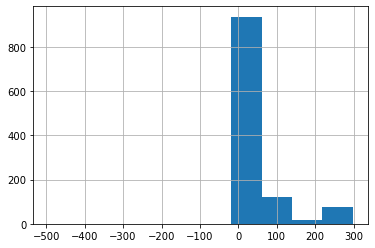

In [47]:
data_c.Length.hist()

In [48]:
data_c.Length.value_counts()

 4      75
 42     65
 5      57
 6      57
 2      45
        ..
 144     1
 147     1
 69      1
 156     1
-494     1
Name: Length, Length: 140, dtype: int64

In [54]:
data_c[data_c.Length.isin([-50])]

,index,ToT,Signal,norm,intact,Start,End,Length
933,9520_a_0,t01,ab00s0e04n01,a,1,54,04,-50


In [55]:
data_c.loc[933,'Start']=0

C:\Users\lvxin\Anaconda3\envs\fastai\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [57]:
data_c['Length'] = data_c.apply(lambda x: int(x['End'])-int(x['Start']), axis=1)

C:\Users\lvxin\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
data_c.Length.value_counts()

4      75
42     65
6      58
5      57
7      45
       ..
144     1
147     1
65      1
156     1
298     1
Name: Length, Length: 139, dtype: int64

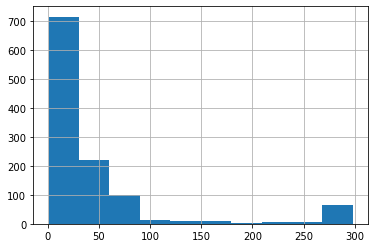

In [59]:
data_c.Length.hist()

In [62]:
data_c['norm'] = data_c.apply(lambda x: 1 if x['norm']=='n' else 0, axis=1)

C:\Users\lvxin\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


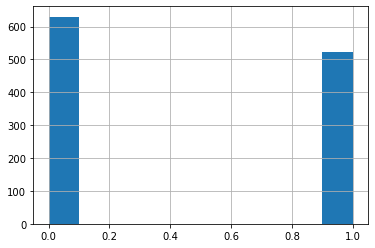

In [63]:
data_c.norm.hist()

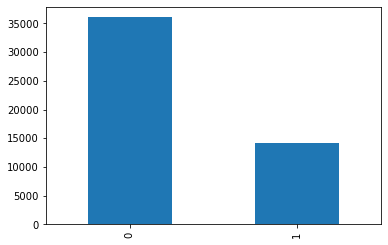

In [64]:
data_c[data_c.norm.isin([1])].Length.sum()
data_c[data_c.norm.isin([0])].Length.sum()
pd.Series([36052,14219]).plot.bar()

In [67]:
data_c.head()

,index,ToT,Signal,norm,intact,Start,End,Length
0,10013_a_0,t02,ab00s0e04n07,0,1,0,04,4
1,10013_a_1,t02,ab01s08e09n07,0,1,08,09,1
2,10013_a_2,t02,ab02s18e20n07,0,1,18,20,2
3,10013_n_0,t02,nm00s20e28,1,1,20,28,8
4,10017_a_0,t02,ab00s0e05n07,0,1,0,05,5


In [72]:
data_c['key']=data_c.apply(lambda x: int(x['index'].split('_')[0]),axis=1)

In [73]:
data_c.head()

,index,ToT,Signal,norm,intact,Start,End,Length,key
0,10013_a_0,t02,ab00s0e04n07,0,1,0,04,4,10013
1,10013_a_1,t02,ab01s08e09n07,0,1,08,09,1,10013
2,10013_a_2,t02,ab02s18e20n07,0,1,18,20,2,10013
3,10013_n_0,t02,nm00s20e28,1,1,20,28,8,10013
4,10017_a_0,t02,ab00s0e05n07,0,1,0,05,5,10017


In [74]:
data_c=data_c.sort_values(by='key',ascending=True)
data_c=data_c.reset_index(drop=True)
data_c.head()

,index,ToT,Signal,norm,intact,Start,End,Length,key
0,8105_a_1,t01,ab01s18e24n01,0,1,18,24,6,8105
1,8105_a_0,t01,ab00s06e16n01,0,1,06,16,10,8105
2,8105_a_2,t01,ab03s27e41n01,0,1,27,41,14,8105
3,8105_n_0,t01,nm00s0e06n02,1,1,0,06,6,8105
4,8106_n_1,t02,nm01s09e25n02,1,1,09,25,16,8106


In [75]:
data_c.to_csv('main_step2.csv')

# generating the data

In [ ]:
#data_c=pd.read_csv('main_step2.csv')

In [76]:
key_set = set(data_c.key)

In [77]:
len(key_set)

603

In [78]:
data_c.key.value_counts()

11595    12
9914     10
11394     8
11449     8
11006     8
         ..
11230     1
11231     1
11232     1
11233     1
10465     1
Name: key, Length: 603, dtype: int64

In [79]:
path = r'E:\Data\Medlink\QualityControl\600\data'
data_files = glob2.glob(os.path.join(path,'*csv'))

In [80]:
key_fn = lambda x: x.split(os.sep)[-1].split('.')[0]

In [81]:
file_list = []
for file in data_files:
    file_list.append(key_fn(file))
file_set = set(file_list)
print(len(file_set))
file_set

598


{'10013',
 '10017',
 '10018',
 '10019',
 '10076',
 '10083',
 '10087',
 '10089',
 '10092',
 '10094',
 '10095',
 '10099',
 '10101',
 '10104',
 '10106',
 '10109',
 '10110',
 '10112',
 '10117',
 '10121',
 '10122',
 '10123',
 '10125',
 '10128',
 '10226',
 '10227',
 '10228',
 '10240',
 '10241',
 '10242',
 '10255',
 '10271',
 '10274',
 '10277',
 '10279',
 '10281',
 '10300',
 '10301',
 '10302',
 '10303',
 '10304',
 '10305',
 '10306',
 '10316',
 '10319',
 '10321',
 '10322',
 '10323',
 '10324',
 '10326',
 '10328',
 '10345',
 '10393',
 '10394',
 '10395',
 '10396',
 '10397',
 '10406',
 '10407',
 '10408',
 '10414',
 '10415',
 '10416',
 '10419',
 '10458',
 '10459',
 '10460',
 '10461',
 '10463',
 '10464',
 '10518',
 '10519',
 '10520',
 '10546',
 '10596',
 '10608',
 '10609',
 '10825',
 '10826',
 '10827',
 '10829',
 '10833',
 '10834',
 '10835',
 '10836',
 '10837',
 '10838',
 '10839',
 '10840',
 '10842',
 '10843',
 '10844',
 '10845',
 '10846',
 '10847',
 '10848',
 '10850',
 '10851',
 '10852',
 '10853',


In [82]:
print(len(key_set),len(file_set))
print(len(key_set-file_set))
key_set-file_set

603 598
603


{8105,
 8106,
 8108,
 8109,
 8110,
 8112,
 8113,
 8150,
 8363,
 8364,
 8365,
 8370,
 8371,
 8389,
 8390,
 8391,
 8392,
 8393,
 8399,
 8400,
 8401,
 8417,
 8418,
 8432,
 8433,
 8452,
 8453,
 8454,
 8455,
 8458,
 8461,
 8464,
 8494,
 8499,
 8508,
 8509,
 8514,
 8517,
 8521,
 8522,
 8523,
 8525,
 8527,
 8528,
 8538,
 8539,
 8540,
 8541,
 8542,
 8543,
 8544,
 8545,
 8546,
 8548,
 8549,
 8550,
 8551,
 8552,
 8553,
 8554,
 8555,
 8556,
 8557,
 8558,
 8559,
 8560,
 8561,
 8562,
 8563,
 8564,
 8565,
 8570,
 8742,
 9036,
 9303,
 9306,
 9312,
 9313,
 9315,
 9316,
 9317,
 9320,
 9348,
 9349,
 9350,
 9351,
 9413,
 9414,
 9415,
 9418,
 9419,
 9420,
 9421,
 9422,
 9423,
 9424,
 9425,
 9426,
 9471,
 9472,
 9473,
 9474,
 9481,
 9482,
 9506,
 9516,
 9517,
 9518,
 9519,
 9520,
 9522,
 9523,
 9524,
 9525,
 9526,
 9539,
 9542,
 9543,
 9544,
 9545,
 9546,
 9549,
 9553,
 9554,
 9555,
 9558,
 9559,
 9561,
 9564,
 9566,
 9572,
 9573,
 9574,
 9575,
 9577,
 9578,
 9579,
 9580,
 9587,
 9589,
 9590,
 9591,
 9592,

In [83]:
ID_set = set(data_c.key.apply(lambda x: str(x)))

In [88]:
print(len(ID_set),len(file_set))
print(len(ID_set-file_set))
diff_set = ID_set-file_set
same_set = ID_set&file_set

603 598
10


In [89]:
len(same_set)

593

In [92]:
diff_set

{'10080',
 '10097',
 '10124',
 '10225',
 '10273',
 '10465',
 '11068',
 '11467',
 '8461',
 '9577'}

In [94]:
print(diff_set&same_set) 

set()


In [86]:
diff_set<ID_set 

True

In [87]:
diff_set<file_set

False

## ----------------------------------

In [95]:
file_name=[]
file_path=[]
for file in data_files:
    file_name.append(int(key_fn(file)))
    file_path.append(file)

file_df = pd.DataFrame({
    'SID':file_name,
    'Path':file_path
})

In [96]:
file_df=file_df.sort_values(by='SID',ascending=True)
file_df=file_df.reset_index(drop=True)
file_df.head()

,SID,Path
0,8105,E:\Data\Medlink\QualityControl\600\data\8105.csv
1,8106,E:\Data\Medlink\QualityControl\600\data\8106.csv
2,8108,E:\Data\Medlink\QualityControl\600\data\8108.csv
3,8109,E:\Data\Medlink\QualityControl\600\data\8109.csv
4,8110,E:\Data\Medlink\QualityControl\600\data\8110.csv


In [97]:
file_df.to_csv('data_file.csv')

## -----------------------------------

In [99]:
file_dict = {}
file_df = pd.read_csv('data_file.csv')
for idx,sid in enumerate(file_df.SID):
    temp = {str(sid):file_df['Path'][idx]}
#     print(str(file_df.Path[idx]))
    file_dict.update(temp)
len(file_dict)

598

In [100]:
main_df1 = pd.read_csv('main_step2.csv')

In [101]:
main_df1.head()

,Unnamed: 0,index,ToT,Signal,norm,intact,Start,End,Length,key
0,0,8105_a_1,t01,ab01s18e24n01,0,1,18,24,6,8105
1,1,8105_a_0,t01,ab00s06e16n01,0,1,6,16,10,8105
2,2,8105_a_2,t01,ab03s27e41n01,0,1,27,41,14,8105
3,3,8105_n_0,t01,nm00s0e06n02,1,1,0,6,6,8105
4,4,8106_n_1,t02,nm01s09e25n02,1,1,9,25,16,8106


In [104]:
main_df1.rename(columns={'key':'main_key'},inplace=True)
main_df1.rename(columns={'index':'key'},inplace=True)

In [106]:
main_df1.head()

,Unnamed: 0,key,ToT,Signal,norm,intact,Start,End,Length,main_key
0,0,8105_a_1,t01,ab01s18e24n01,0,1,18,24,6,8105
1,1,8105_a_0,t01,ab00s06e16n01,0,1,6,16,10,8105
2,2,8105_a_2,t01,ab03s27e41n01,0,1,27,41,14,8105
3,3,8105_n_0,t01,nm00s0e06n02,1,1,0,6,6,8105
4,4,8106_n_1,t02,nm01s09e25n02,1,1,9,25,16,8106


## seg data generation

In [ ]:
path_list=[]
key_list=[]
key_s_list=[]
start_list=[]
end_list=[]
signal_list=[]
total_length=[]
segname_list=[]
maxlen_list=[]

len_patch = 4 #second
fs = 250*4
base_dir = r'E:\Data\Medlink\QualityControl\600\seg_data'

key_fn = lambda x: x.split('_')[0]

for idx,key in enumerate(tqdm(main_df1['key'])):
    data_len = main_df1.Length[idx]
    n = (data_len)//len_patch
    
    key_t = main_df1.key[idx]
    key = key_fn(main_df1.key[idx])
    
    start = main_df1.Start[idx]
    
    if 'n' in key_t:
        data_len = n
    elif 'a' in key_t:
        data_len = n+1

    try:
#         print(idx,key_t,data_len,main_df1.Signal[idx],file_dict[key])
        signal = pd.read_csv(file_dict[key])
        signal.columns = ['data']
        max_len = len(signal)
#         print(key, file_dict[key])
#         print(signal)
    except:
        print(key,' file not found.')
        continue
    
#     print(idx,key,key_t,n)

#     if idx >=100:
#         break
    
    
            
    
    for i in range(data_len):
        key_tmp = key_t+'_'+str(i)
        start_tmp = start + i*len_patch
        sta_p = start_tmp*fs
        end_p = sta_p+len_patch*fs
        
        if (end_p/4+1)>max_len:
            print('warning:',key_tmp,max_len,end_p)
            continue
        
#         sig_tmp = signal.data[sta_p:end_p]
        
        sig_seg_tmp = signal.data.loc[sta_p:end_p]
        seg_csv_name = os.path.join(base_dir,key_tmp+'.csv')
        
#         print(key_tmp,n,i,start,sta_p,end_p,seg_csv_name)
        
        sig_seg_tmp.to_csv(seg_csv_name)
        
        segname_list.append(seg_csv_name)
        
        key_s_list.append(key_tmp)
        key_list.append(int(key))
        path_list.append(file_dict[key])
        start_list.append(sta_p)
        end_list.append(end_p)
        signal_list.append(main_df1.Signal[idx])
        maxlen_list.append(max_len)

In [ ]:
sig_seg_df = pd.DataFrame({
    'key':key_list,
    'key_seg':key_s_list,
    'signal':signal_list,
    'path':path_list,
    'start':start_list,
    'end':end_list,
    'seg_path':segname_list,
    'max_len':maxlen_list
})

In [ ]:
sig_seg_df['max_len'] = sig_seg_df.apply(lambda x: (x['max_len']-1)*4,axis=1)

In [ ]:
sig_seg_df['tag']=sig_seg_df.apply(lambda x: 1 if x['key_seg'].split('_')[1]=='a' else 0,axis=1)

In [ ]:
sig_seg_df.tag.hist()

In [ ]:
sig_seg_df.to_csv('sig_seg.csv')

## prepare for the classification

In [107]:
base_dir =  r'E:\Data\Medlink\QualityControl\600'
csv = 'sig_seg.csv'
df = pd.read_csv(os.path.join(base_dir,csv))
df.head()

,Unnamed: 0,key,key_seg,signal,path,start,end,seg_path,max_len,tag
0,0,8105,8105_a_1_0,ab01s18e24n01,E:\Data\Medlink\QualityControl\600\data\8105.csv,18000,22000,E:\Data\Medlink\QualityControl\600\seg_data\81...,43000,1
1,1,8105,8105_a_1_1,ab01s18e24n01,E:\Data\Medlink\QualityControl\600\data\8105.csv,22000,26000,E:\Data\Medlink\QualityControl\600\seg_data\81...,43000,1
2,2,8105,8105_a_0_0,ab00s06e16n01,E:\Data\Medlink\QualityControl\600\data\8105.csv,6000,10000,E:\Data\Medlink\QualityControl\600\seg_data\81...,43000,1
3,3,8105,8105_a_0_1,ab00s06e16n01,E:\Data\Medlink\QualityControl\600\data\8105.csv,10000,14000,E:\Data\Medlink\QualityControl\600\seg_data\81...,43000,1
4,4,8105,8105_a_0_2,ab00s06e16n01,E:\Data\Medlink\QualityControl\600\data\8105.csv,14000,18000,E:\Data\Medlink\QualityControl\600\seg_data\81...,43000,1


In [108]:
key_set = set(df.key)
len(key_set)
SEED = 1
patients_verified = list(set(key_set))
N_SELECT_total = len(set(key_set))
N_SELECT_valid = round(N_SELECT_total*0.2)
np.random.seed(SEED)

In [109]:
# split for train/valid
patients_selected = np.random.choice(patients_verified, N_SELECT_valid, replace=False)
patients_train = list(set(patients_verified) - set(patients_selected))
print('verified patients: {}'.format(len(patients_verified)))
print('selected patients: {}'.format(len(patients_selected)))
print('selected patients for train: {}'.format(len(patients_train)))

verified patients: 592
selected patients: 118
selected patients for train: 474


In [110]:
df['valid']=df.apply(lambda x: 1 if x['key'] in set(patients_selected) else 0, axis=1)

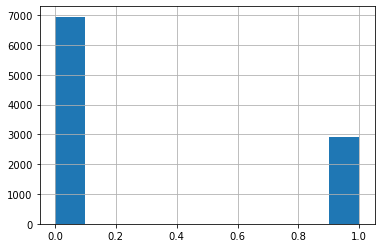

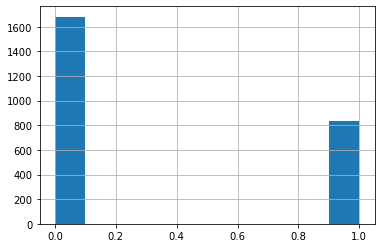

In [112]:
grouped = df.groupby(df['valid'])
for value, group in grouped:
    plt.figure()
    group.tag.hist()

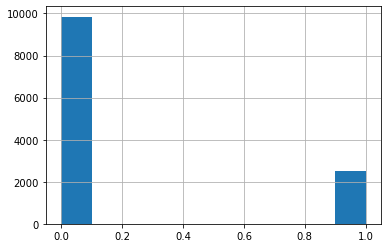

In [111]:
df.valid.hist()

In [ ]:
df.to_csv('ecg_classification.csv')